# Topics Covered in this notebook

1)Deque

2)Graphs

3)Left Order Traversal

4)Breadth First Search

# Deque

## Double-ended Queue

With Python lists, we can add and remove elements from the *end* of the list in constant time, but adding and removing from the beginning takes linear time.
That's because Python lists are implemented using arrays that grow dynamically.

With linked lists, we can add and remove elements from the *beginning* of the list in constant time, but adding and removing from the end takes linear time.

With either of these implementations, it is easy to make a stack, that is, a collection where the first element we add is the last element we remove. A stack is also called a "first-in, last-out" queue, abbreviated FILO.

But it is not easy to implement a "first-in, first-out" queue, that is, a collection where the first element we add is the *first* element we remove.

Fortunately, there are ways to implement lists that can add and remove elements from both ends in constant time.
A collection that has this property is called a double-ended queue, abbreviated "deque" and pronounced like "deck".

One way to implement a deque is a doubly-linked list, also known as a "head-tail linked list".
Each node in a doubly-linked list has a reference to the previous node in the list as well as the next element, which I will call `left` and `right`.


In [1]:
class Node:
    def __init__(self, data, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right

    def __repr__(self):
        return f'Node({self.data})'

We can create nodes like this:

In [2]:
node1 = Node(1)
node2 = Node(2)
node3 = Node(3)

node1

Node(1)

And then link them up, like this:

In [3]:
node1.right = node2
node2.right = node3

node2.left = node1
node3.left = node2

To traverse the list from left to right, we can start at the beginning and follow the `right` links.

In [4]:
node = node1
while node:
    print(node)
    node = node.right

Node(1)
Node(2)
Node(3)


To traverse from right to left, we start and the end and follow the `left` links.

In [5]:
node = node3
while node:
    print(node)
    node = node.left

Node(3)
Node(2)
Node(1)


## Deque objects

For some operations, it will be convenient to have another object that represents the whole list (as opposed to one of its nodes).

Here's the class definition.

In [6]:
class Deque:
    def __init__(self, head=None, tail=None):
        self.head = head
        self.tail = tail

    def __repr__(self):
        return f'LinkedList({self.head}, {self.tail})'

Now we can create a `Deque` with references to `node1` and `node3`:

In [7]:
deque = Deque(node1, node3)
deque

LinkedList(Node(1), Node(3))

For debugging purposes, I'll use the following function, which prints the list from right to left and then left to right, which confirms that all of the links are correct.

In [8]:
def print_deque(deque):
    node = deque.head
    while node:
        print(node.data, end=', ')
        node = node.right
    print()

    node = deque.tail
    while node:
        print(node.data, end=', ')
        node = node.left
    print()

Here's an example.

In [9]:
print_deque(deque)

1, 2, 3, 
3, 2, 1, 


## Push

Now let's see how we can add and remove elements from the beginning and end in constant time.
We'll start with the push operations.

If we start with an empty deque, adding the first node is a special case, so I'll pull that into a function.

In [10]:
def push_first(deque, value):
    deque.head = deque.tail = Node(value, None, None)

Here's an example.

In [11]:
deque = Deque()
push_first(deque, 1)
print_deque(deque)

1, 
1, 


**Exercise:**  Write `left_push`, which takes a `Deque` object and a new value, and adds the value to the beginning of the deque.

If the queue is empty, it should call `push_first` to handle the special case; otherwise it should handle the general case.

In [12]:
def left_push(deque, value):
  if deque.head is None:
    push_first(deque, value)
  else:
    new_node = Node(value)
    new_node.right = deque.head
    deque.head.left = new_node
    deque.head = new_node


You can use the following examples to test your function:

In [13]:
deque = Deque()
left_push(deque, 2)
print_deque(deque)

2, 
2, 


In [14]:
left_push(deque, 1)
print_deque(deque)

1, 2, 
2, 1, 


**Exercise:**  Write `right_push`, which takes a `Deque` object and a new value, and adds the value to the end of the deque.

If the queue is empty, it should call `push_first` to handle the special case; otherwise it should handle the general case.

In [18]:
def right_push(deque, value):
  if deque.head is None:
    push_first(deque, value)
  else:
    new_node = Node(value)
    new_node.left = deque.tail
    deque.tail.right = new_node
    deque.tail = new_node


You can use the following examples to test your function:

In [19]:
deque = Deque()
right_push(deque, 3)
print_deque(deque)

3, 
3, 


In [20]:
right_push(deque, 4)
print_deque(deque)

3, 4, 
4, 3, 


## Pop

To pop elements from the deque, we have to handle two special cases:

* If `head` and `tail` are both `None`, the deque is empty and we should raise a `ValueError`.

* If `head` and `tail` refer to the same `Node`, there is only one element, so we should remove it and leave the deque empty.

The following function handles these cases.

In [21]:
def pop_last(deque):
    if deque.head is None:
        raise ValueError('Tried to pop from empty deque')

    old_head = deque.head
    deque.head = deque.tail = None
    return old_head.data

We can test it like this:

In [22]:
deque = Deque()
left_push(deque, 1)
pop_last(deque)

1

In [23]:
print_deque(deque)

**Exercise:**  Write `left_pop`, which takes a `Deque` object, remove the first node, and return the first data value.

If the queue is empty or has a single element, it should call `pop_last` to handle the special case; otherwise it should handle the general case.

In [24]:
def left_pop(deque):
    if deque.head is None:
        raise ValueError('Tried to pop from empty deque')

    if deque.head == deque.tail:
        return pop_last(deque)

    old_head = deque.head
    deque.head = deque.head.right
    deque.head.left = None
    return old_head.data


# You can use the following examples to test your function:
deque = Deque()
left_push(deque, 1)
left_push(deque, 2)
left_push(deque, 3)
print_deque(deque)

left_pop(deque)
print_deque(deque)

left_pop(deque)
print_deque(deque)

left_pop(deque)
print_deque(deque)



3, 2, 1, 
1, 2, 3, 
2, 1, 
1, 2, 
1, 
1, 




Check to see whether the remaining list is well-formed.

In [30]:
try:
    left_pop(deque)
except ValueError as e:
    print(e)

Tried to pop from empty deque


**Exercise:**  Write `right_pop`, which takes a `Deque` object, remove the last node, and return the last data value.

If the queue is empty or has a single element, it should call `pop_last` to handle the special case; otherwise it should handle the general case.

In [31]:
def right_pop(deque):
    if deque.head is None:
        raise ValueError('Tried to pop from empty deque')

    if deque.head == deque.tail:
        return pop_last(deque)

    old_tail = deque.tail
    deque.tail = deque.tail.left
    deque.tail.right = None
    return old_tail.data

# You can use the following examples to test your function:
deque = Deque()
right_push(deque, 1)
right_push(deque, 2)
right_push(deque, 3)
print_deque(deque)

right_pop(deque)
print_deque(deque)

right_pop(deque)
print_deque(deque)

right_pop(deque)
print_deque(deque)

# Check to see whether the remaining list is well-formed.
try:
    right_pop(deque)
except ValueError as e:
    print(e)


1, 2, 3, 
3, 2, 1, 
1, 2, 
2, 1, 
1, 
1, 


Tried to pop from empty deque


## collections.deque

The Python collections module provides an implementation of a deque.
You can read the
[documentation here](https://docs.python.org/3/library/collections.html#collections.deque)
and the
[source code here](https://github.com/python/cpython/blob/d943d19172aa93ce88bade15b9f23a0ce3bc72ff/Modules/_collectionsmodule.c).

To confirm that it can add and remove elements from the beginning and end in constant time, let's run some timing tests.

In [32]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/DSIRP/raw/main/timing.py')

Downloaded timing.py


In [33]:
from collections import deque

def appendleft(n):
    d = deque()
    [d.appendleft(x) for x in range(n)]

In [34]:
def popleft(n):
    d = deque()
    [d.appendleft(x) for x in range(n)]
    [d.popleft() for _ in range(n)]

In [35]:
from timing import run_timing_test

ns, ts = run_timing_test(appendleft)

1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.009999999999999787
32768 0.0
65536 0.009999999999999787
131072 0.02000000000000135
262144 0.02999999999999936
524288 0.05999999999999872
1048576 0.1700000000000017
2097152 0.28999999999999915
4194304 0.620000000000001
8388608 1.1999999999999993


In [36]:
def append(n):
    d = deque()
    [d.append(x) for x in range(n)]

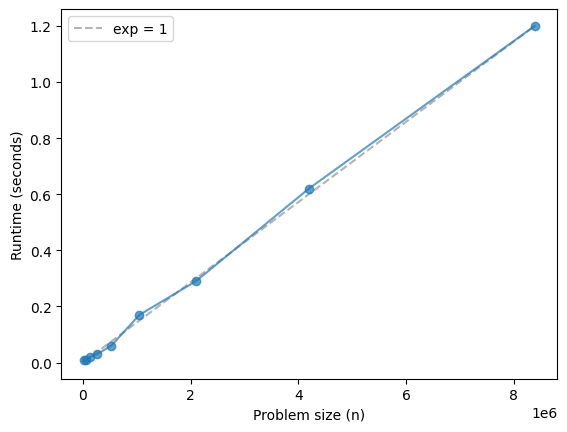

In [37]:
from timing import plot_timing_test

plot_timing_test(ns, ts, scale='linear')

Running these operations `n` times is linear in `n`, which means that each one is constant time, at least on average.

# Graphs

## Graph

A graph is a collection of nodes and edges, where nodes often represent objects or ideas, and edges represent relationships among them.
For example, in a graph that represents a social network, nodes might represent people and edges might represent friendships between them.

NetworkX provides data structures to represent graphs and function that implement graph algorithms.
To show how it works, we'll make a small graph that represents a social network.

Here's how we make a graph and add nodes.

In [38]:
import networkx as nx

G = nx.Graph()
G.add_node('Alice')
G.add_node('Bob', age=23)
G.add_node('Carol', cat='mittens')
list(G.nodes())

['Alice', 'Bob', 'Carol']

Optionally, you can provide attributes that are associated with the node. In this example, Bob has an `age` attribute and Carol has a cat.

Here's how we add edges between nodes.

In [39]:
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Carol', type='enemy')
list(G.edges())

[('Alice', 'Bob'), ('Alice', 'Carol')]

Optionally, you can provide attributes that are associated with the edge.
In this example, the second edge has an attribute called `type` that indicates the nature of the relationship.

Here's how to draw the graph.

In [40]:
def draw_graph(G):
    nx.draw_circular(G, node_size=1500, with_labels=True)

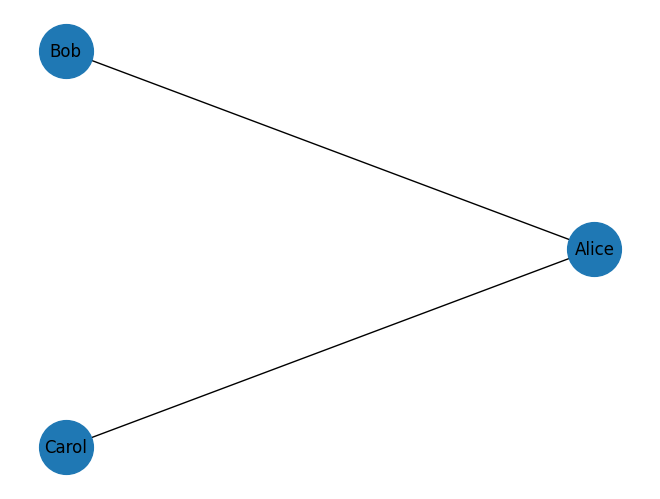

In [41]:
draw_graph(G)

**Exercise:**  Suppose Alice introduces Bob and Carol, and they become frenemies. Update the social network by adding an edge between Bob and Carol with an appropriate attribute, then draw the graph  again.

## Graph Representation

NetworkX represents graphs using a dictionary that maps from each node to a dictionary that maps from nodes to edges.

If we select an element from the top-level dictionary, the result is a dictionary-like object.

In [42]:
G['Alice']

AtlasView({'Bob': {}, 'Carol': {'type': 'enemy'}})

So we can iterate through the neighbors of a node like this:

In [43]:
for neighbor in G['Alice']:
    print(neighbor)

Bob
Carol


Or enumerate the neighbors and edges like this:

In [44]:
for key, value in G['Alice'].items():
    print(key, value)

Bob {}
Carol {'type': 'enemy'}


Edges are represented by dictionaries of attributes. In this example, the first edge has no attributes and the second has an attribute named `type`.

We can select an edge like this:

In [45]:
G['Alice']['Carol']

{'type': 'enemy'}

To check whether there is an edge from one node to another, we can use the `in` operator:

In [46]:
def has_edge(G, u, v):
    return v in G[u]

In [47]:
has_edge(G, 'Alice', 'Bob')

True

But there's a method that does the same thing.

In [48]:
G.has_edge('Alice', 'Bob')

True

## Complete graph

In a complete graph, all nodes are connected to each other.
To make a complete graph, we'll use the following generator function, iterates through all pairs of nodes.

In [49]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

Here's a complete graph with 10 nodes:

In [50]:
def make_complete_graph(n):
    nodes = range(n)
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

In [51]:
complete = make_complete_graph(10)

And here's what it looks like.

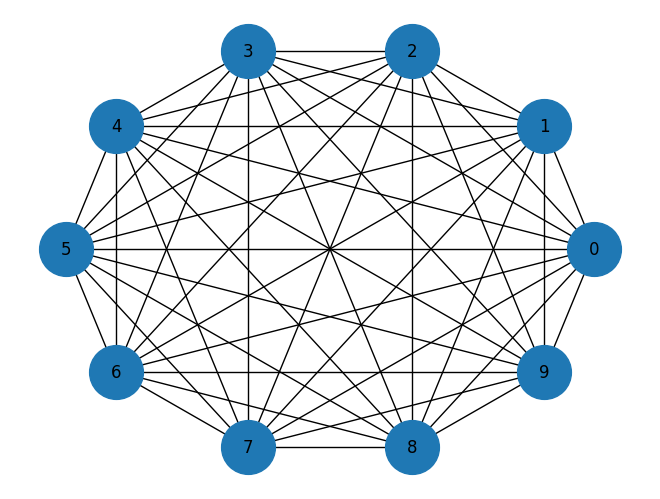

In [52]:
draw_graph(complete)

## Random graphs

Next we'll make an Erdos-Renyi graph, which is a random graph where the probability of an edge between each pair of nodes is $p$.

The helper function `flip` returns `True` with probability `p` and `False` with probability `1-p`

In [53]:
import random

def flip(p):
    return random.random() < p

`random_pairs` is a generator function that enumerates all possible pairs of nodes and yields each one with probability `p`

In [54]:
def random_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge

`make_random_graph` makes an ER graph where the probability of an edge between each pair of nodes is `p`.

In [55]:
def make_random_graph(n, p):
    nodes = range(n)
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

Here's an example with `n=10` and `p=0.3`

In [56]:
random_graph = make_random_graph(10, 0.3)
len(random_graph.edges())

6

And here's what it looks like:

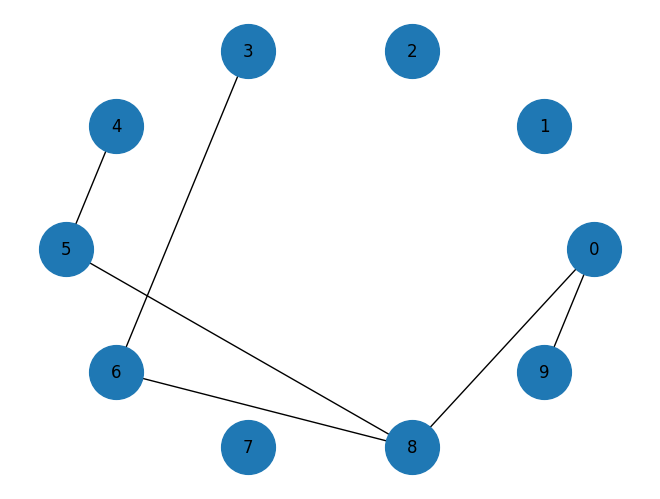

In [57]:
draw_graph(random_graph)

# Level Order Traversal

## More tree traversal

In a previous notebook we wrote two versions of a depth-first search in a tree.
Now we are working toward depth-first search, but we're going to make a stop along the way: level-order traversal.

One application of level-order traversal is searching through directories (aka folders) in a file system.
Since directories can contain other directories, which can contains other directories, and so on, we can think of a file system as a tree.

In this notebook, we'll start by making a tree of directories and fake data files.
Then we'll traverse it several ways.

And while we're at it, we'll learn about the `os` module, which provides functions for interacting with the operating system, especially the file system.



The `os` module provides `mkdir`, which creates a directory. It raises an exception if the directory exists, so I'm going to wrap it in a `try` statement.

In [59]:
import os

def mkdir(dirname):
    try:
        os.mkdir(dirname)
        print('made', dirname)
    except FileExistsError:
        print(dirname, 'exists')

Now I'll create the directory where we'll put the fake data.

In [60]:
mkdir('level_data')

made level_data


Inside `level_data`, I want to make a subdirectory named `2021`.
It is tempting to write something like:

```
year_dir = `level_data/2021`
```

This path would work on Unix operating systems (including MacOS), but not Windows, which uses `\` rather than `/` between names in a path.

We can avoid this problem by using `os.path.join`, which joins names in a path with whatever character the operating system wants.

In [61]:
year_dir = os.path.join('level_data', '2021')
mkdir(year_dir)

made level_data/2021


To make the fake data files, I'll use the following function, which opens a file for writing and puts the word `data` into it.

In [62]:
def make_datafile(dirname, filename):
    filename = os.path.join(dirname, filename)
    open(filename, 'w').write('data\n')
    print('made', filename)

So let's start by putting a data file in `year_dir`, imagining that this file contains summary data for the whole year.

In [63]:
make_datafile(year_dir, 'year.csv')

made level_data/2021/year.csv


The following function

1. Makes a subdirectory that represents one month of the year,

2. Makes a data file we imagine contains summary data for the month, and

3. Calls `make_day` (below) to make subdirectories each day of the month (in a world where all months have 30 days).

In [64]:
def make_month(i, year_dir):
    month = '%.2d' % i
    month_dir = os.path.join(year_dir, month)
    mkdir(month_dir)
    make_datafile(month_dir, 'month.csv')

    for j in range(1, 31):
        make_day(j, month_dir)

`make_day` makes a sub-subdirectory for a given day of the month, and puts a data file in it.

In [65]:
def make_day(j, month_dir):
    day = '%.2d' % j
    day_dir = os.path.join(month_dir, day)
    mkdir(day_dir)
    make_datafile(day_dir, 'day.csv')

The following loop makes a directory for each month.

In [66]:
for i in range(1, 13):
    make_month(i, year_dir)

made level_data/2021/01
made level_data/2021/01/month.csv
made level_data/2021/01/01
made level_data/2021/01/01/day.csv
made level_data/2021/01/02
made level_data/2021/01/02/day.csv
made level_data/2021/01/03
made level_data/2021/01/03/day.csv
made level_data/2021/01/04
made level_data/2021/01/04/day.csv
made level_data/2021/01/05
made level_data/2021/01/05/day.csv
made level_data/2021/01/06
made level_data/2021/01/06/day.csv
made level_data/2021/01/07
made level_data/2021/01/07/day.csv
made level_data/2021/01/08
made level_data/2021/01/08/day.csv
made level_data/2021/01/09
made level_data/2021/01/09/day.csv
made level_data/2021/01/10
made level_data/2021/01/10/day.csv
made level_data/2021/01/11
made level_data/2021/01/11/day.csv
made level_data/2021/01/12
made level_data/2021/01/12/day.csv
made level_data/2021/01/13
made level_data/2021/01/13/day.csv
made level_data/2021/01/14
made level_data/2021/01/14/day.csv
made level_data/2021/01/15
made level_data/2021/01/15/day.csv
made level_d

## Walking a Directory

The `os` module provides `walk`, which is a generator function that traverses a directory and all its subdirectories, and all their subdirectories, and so on.


For each directory, it yields:

* dirpath, which is the name of the directory.

* dirnames, which is a list of subdirectories it contains, and

* filenames, which is a list of files it contains.

Here's how we can use it to print the paths of all files in the directory we created.

In [67]:
for dirpath, dirnames, filenames in os.walk('level_data'):
    for filename in filenames:
        path = os.path.join(dirpath, filename)
        print(path)

level_data/2021/year.csv
level_data/2021/06/month.csv
level_data/2021/06/20/day.csv
level_data/2021/06/14/day.csv
level_data/2021/06/19/day.csv
level_data/2021/06/30/day.csv
level_data/2021/06/18/day.csv
level_data/2021/06/26/day.csv
level_data/2021/06/06/day.csv
level_data/2021/06/07/day.csv
level_data/2021/06/03/day.csv
level_data/2021/06/04/day.csv
level_data/2021/06/08/day.csv
level_data/2021/06/10/day.csv
level_data/2021/06/12/day.csv
level_data/2021/06/17/day.csv
level_data/2021/06/25/day.csv
level_data/2021/06/28/day.csv
level_data/2021/06/21/day.csv
level_data/2021/06/11/day.csv
level_data/2021/06/23/day.csv
level_data/2021/06/22/day.csv
level_data/2021/06/15/day.csv
level_data/2021/06/05/day.csv
level_data/2021/06/24/day.csv
level_data/2021/06/09/day.csv
level_data/2021/06/13/day.csv
level_data/2021/06/29/day.csv
level_data/2021/06/01/day.csv
level_data/2021/06/16/day.csv
level_data/2021/06/27/day.csv
level_data/2021/06/02/day.csv
level_data/2021/07/month.csv
level_data/2021/0

One quirk of `os.walk` is that the directories and files don't appear in any particular order.
Of course, we can store the results and sort them in whatever order we want.

But as an exercise, we can write our own version of `walk`.
We'll need two functions:

* `os.listdir`, which takes a directory and list the directories and files it contains, and

* `os.path.isfile`, which takes a path and returns `True` if it is a file, and `False` if it is a directory or something else.

You might notice that some file-related functions are in the submodule `os.path`.
There is some logic to this organization, but it is not always obvious why a particular function is in this submodule or not.

Anyway, here is a recursive version of `walk`:

In [68]:
def walk(dirname):
    for name in sorted(os.listdir(dirname)):
        path = os.path.join(dirname, name)
        if os.path.isfile(path):
            print(path)
        else:
            walk(path)

In [ ]:
walk(year_dir)

**Exercise:** Write a version of `walk` called `walk_gen` that is a generator function; that is, it should yield the paths it finds rather than printing them.

In [69]:

def walk_gen(dirname):
    for name in sorted(os.listdir(dirname)):
        path = os.path.join(dirname, name)
        if os.path.isfile(path):
            yield path
        else:
            yield from walk_gen(path)


You can use the following loop to test your code.

In [70]:
for path in walk_gen(year_dir):
    print(path)

level_data/2021/01/01/day.csv
level_data/2021/01/02/day.csv
level_data/2021/01/03/day.csv
level_data/2021/01/04/day.csv
level_data/2021/01/05/day.csv
level_data/2021/01/06/day.csv
level_data/2021/01/07/day.csv
level_data/2021/01/08/day.csv
level_data/2021/01/09/day.csv
level_data/2021/01/10/day.csv
level_data/2021/01/11/day.csv
level_data/2021/01/12/day.csv
level_data/2021/01/13/day.csv
level_data/2021/01/14/day.csv
level_data/2021/01/15/day.csv
level_data/2021/01/16/day.csv
level_data/2021/01/17/day.csv
level_data/2021/01/18/day.csv
level_data/2021/01/19/day.csv
level_data/2021/01/20/day.csv
level_data/2021/01/21/day.csv
level_data/2021/01/22/day.csv
level_data/2021/01/23/day.csv
level_data/2021/01/24/day.csv
level_data/2021/01/25/day.csv
level_data/2021/01/26/day.csv
level_data/2021/01/27/day.csv
level_data/2021/01/28/day.csv
level_data/2021/01/29/day.csv
level_data/2021/01/30/day.csv
level_data/2021/01/month.csv
level_data/2021/02/01/day.csv
level_data/2021/02/02/day.csv
level_data/

**Exercise:** Write a version of `walk_gen` called `walk_dfs` that traverses the given directory and yields the file it contains, but it should use a stack and run iteratively, rather than recursively.

In [71]:
def walk_dfs(dirname):
    stack = [dirname]
    while stack:
        current_dir = stack.pop()
        for name in sorted(os.listdir(current_dir)):
            path = os.path.join(current_dir, name)
            if os.path.isfile(path):
                yield path
            else:
                stack.append(path)


You can use the following loop to test your code.

In [72]:
for path in walk_dfs(year_dir):
    print(path)

level_data/2021/year.csv
level_data/2021/12/month.csv
level_data/2021/12/30/day.csv
level_data/2021/12/29/day.csv
level_data/2021/12/28/day.csv
level_data/2021/12/27/day.csv
level_data/2021/12/26/day.csv
level_data/2021/12/25/day.csv
level_data/2021/12/24/day.csv
level_data/2021/12/23/day.csv
level_data/2021/12/22/day.csv
level_data/2021/12/21/day.csv
level_data/2021/12/20/day.csv
level_data/2021/12/19/day.csv
level_data/2021/12/18/day.csv
level_data/2021/12/17/day.csv
level_data/2021/12/16/day.csv
level_data/2021/12/15/day.csv
level_data/2021/12/14/day.csv
level_data/2021/12/13/day.csv
level_data/2021/12/12/day.csv
level_data/2021/12/11/day.csv
level_data/2021/12/10/day.csv
level_data/2021/12/09/day.csv
level_data/2021/12/08/day.csv
level_data/2021/12/07/day.csv
level_data/2021/12/06/day.csv
level_data/2021/12/05/day.csv
level_data/2021/12/04/day.csv
level_data/2021/12/03/day.csv
level_data/2021/12/02/day.csv
level_data/2021/12/01/day.csv
level_data/2021/11/month.csv
level_data/2021/1

Notice that the order the files are discovered is "depth-first". For example, it yields all files from the first month before any of the files for the second month.

An alternative is a level-order traversal, which yields all files at the first level (the annual summary), then all the files at the second level (the monthly summaries), then the files at the third level.

To implement a level-order traversal, we can make a minimal change to `walk_dfs`: replace the stack with a FIFO queue.
To implement the queue efficiently, we can use `collections.deque`.


# Breadth First Search

In the previous notebook, we constructed an Erdos-Renyi graph and wrote a version of depth-first search (DFS) that works for graphs.

When we did DFS in a tree, there was only one path from the root to any other node, so we never discovered the same node twice.
In a graph, there might be multiple paths to the same node.
To avoid discovering the same node over and over, we have to keep track of the nodes we've seen.

In this notebook, we'll adapt the level-order traversal in the same way; the result is a breadth-first search (BFS).
Then we'll adapt BFS to implement Dijkstra's algorithm, which computes the shortest path from a starting node to every other node (provided it is reachable).

We'll test these functions with a Watts-Strogatz graph, then replicate part of an experiment from a [well-known paper](https://github.com/AllenDowney/ThinkComplexity2/blob/master/papers/watts98collective.pdf).

## Watts-Strogatz graphs

A Watts-Strogatz (WS) graph is a random graph, like an Erdos-Renyi graph, but the construction process is different.
A WS graph starts with a ring lattice and randomly "rewires" some of the edges.

NetworkX provides [a function that makes a WS graph](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html), so we can see what it looks like.

Here's an example with `n=10` nodes, each connected to `k=2` neighbors, with probability `p=0` of rewiring each edge.

In [73]:
import networkx as nx

G = nx.watts_strogatz_graph(n=10, k=3, p=0)
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

The result is a ring where each node holds hands with its immediate neighbors.

In [74]:
def draw_graph(G):
    nx.draw_circular(G, node_size=1000, with_labels=True)

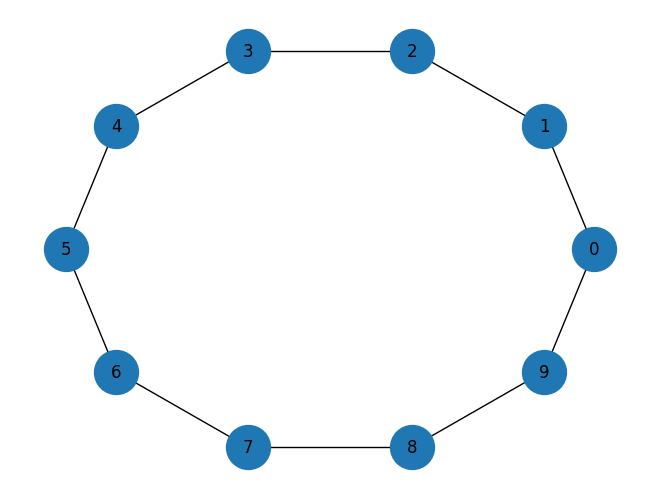

In [75]:
draw_graph(G)

**Exercise:** Run this code again with different values of `k` and `p` to see what the effect is.

Note: If `k` is odd, it gets "rounded down" to an even number.

## Breadth-first search

Here's the function from the previous notebook that implements depth-first search in a graph.

In [76]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G[node])
    return seen

In [77]:
reachable_nodes(G, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

## Fast BFS

NetworkX provides a simple, fast implementation of BFS, available from [the NetworkX repository on GitHub](https://github.com/networkx/networkx/blob/master/networkx/algorithms/components/connected.py).
Here is a version I modified to return a set of nodes:

In [78]:
def plain_bfs(G, start):
    seen = set()
    nextlevel = {start}
    while nextlevel:
        thislevel = nextlevel
        nextlevel = set()
        for v in thislevel:
            if v not in seen:
                seen.add(v)
                nextlevel.update(G[v])
    return seen

In [79]:
G = nx.watts_strogatz_graph(1000, 10, 0.01)

In [81]:
%timeit plain_bfs(G, 0)

1.34 ms ± 335 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Dijkstra's algorithm

During a breadth-first search, whenever we discover a new node, the path we took must be the shortest.
That's necessarily true because, if there had been a shorter path, we would have discovered the node sooner.

This insight is the basis of Dijkstra's algorithm, which computes the shortest path from a give "source" node to all other (reachable) nodes.

The general version of Dijkstra's algorithm works on graphs where the edges have different lengths, like the distance between cities, for example.

We'll start with a simpler version where all edges have length `1`.
This version is similar to BFS, with one change: instead of keeping a set of nodes that have already been seen, we keep a dictionary that maps from each discovered node to its distance from the source.

**Exercise:** Write a version of `reachable_nodes_bfs` called `shortest_path_dijkstra`. It should take a graph and a source node as parameters and return a dictionary that maps from each reachable node to its distance from the source.

Hint: Start with a dictionary that maps from the source node to distance `0`.

In [82]:
def shortest_path_dijkstra(G, source):
    dist = {source: 0}
    queue = deque([source])
    while queue:
        node = queue.popleft()
        for neighbor in G[node]:
            if neighbor not in dist:
                dist[neighbor] = dist[node] + 1
                queue.append(neighbor)
    return dist


We'll test it on a ring lattice.

In [83]:
G = nx.watts_strogatz_graph(10, 4, 0)

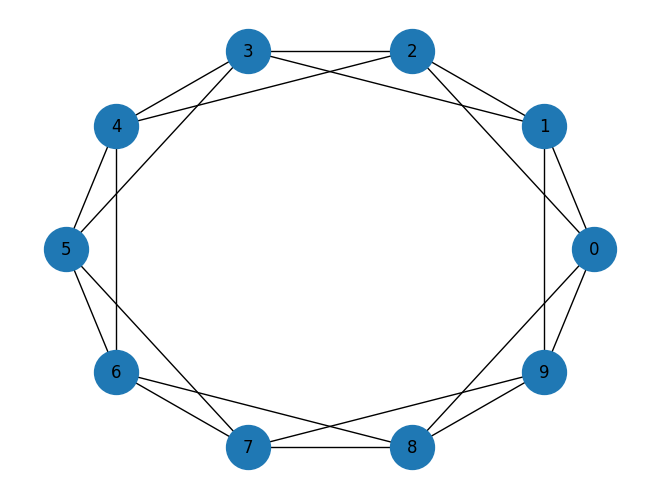

In [84]:
draw_graph(G)

In [85]:
shortest_path_dijkstra(G, 0)

{0: 0, 1: 1, 9: 1, 2: 1, 8: 1, 3: 2, 7: 2, 4: 2, 6: 2, 5: 3}

**Exercise:** Starting with `plain_bfs` write a (possibly faster) implementation of Dijkstra's algorithm that returns a dictionary that maps from each reachable node to its distance from a given source node.

In [86]:
def dijkstra_bfs(G, source):
    dist = {source: 0}
    nextlevel = {source}
    while nextlevel:
        thislevel = nextlevel
        nextlevel = set()
        for v in thislevel:
            for neighbor in G[v]:
                if neighbor not in dist:
                    dist[neighbor] = dist[v] + 1
                    nextlevel.add(neighbor)
    return dist


You can use the following example to test it.

In [88]:
G = nx.watts_strogatz_graph(1000, 10, 0)
d1 = shortest_path_dijkstra(G, 0)
d2 = dijkstra_bfs(G, 0)
d1 == d2

True

And let's see which version is faster.

In [89]:
%timeit shortest_path_dijkstra(G, 0)

1.6 ms ± 353 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [90]:
%timeit dijkstra_bfs(G, 0)

1.53 ms ± 312 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


We can also compare it to the NetworkX function that does the same thing.

In [91]:
%timeit nx.shortest_path_length(G, 0)

1.03 ms ± 284 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## The WS Experiment

The original purpose of the Watts-Strogatz graph is to explore the structure of social networks, particularly the "small world" phenomenon, also known as "six degrees of separation".

The observation is that path lengths in social networks are shorter than you might expect: the distance between any two people on earth might be six connections (or less) on average.

The random edges in a WS graph often connect people in parts of the graph that would otherwise be far apart. Even a small number of these "long links" can greatly reduce the average path length.

To replicate part of their original experiment, I'll use `nx.average_shortest_path_length`, which takes a graph, uses the unweighted version of Dijkstra's algorithm to compute the shortest path from each node to all of the others, and returns the average of the shortest path lengths.

In [92]:
G = nx.watts_strogatz_graph(10, 4, 0)
nx.average_shortest_path_length(G)

1.6666666666666667

In [93]:
G = nx.watts_strogatz_graph(1000, 10, 0)
nx.average_shortest_path_length(G)

50.450450450450454

We'll run this function for WS graphs with a range of values for `p`.

In [94]:
import numpy as np

ps = np.logspace(-4, 0, 9)
print(ps)

[1.00000000e-04 3.16227766e-04 1.00000000e-03 3.16227766e-03
 1.00000000e-02 3.16227766e-02 1.00000000e-01 3.16227766e-01
 1.00000000e+00]


In [95]:
lengths = []

n = 1000
k = 10
for p in ps:
    print(p)
    G = nx.watts_strogatz_graph(n, k, p)
    aspl = nx.average_shortest_path_length(G)
    lengths.append(aspl)

0.0001
0.00031622776601683794
0.001
0.0031622776601683794
0.01
0.03162277660168379
0.1
0.31622776601683794
1.0


Here's what the result looks like.

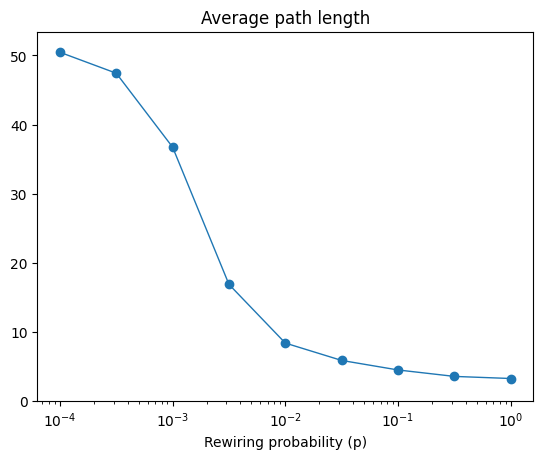

In [96]:
import matplotlib.pyplot as plt

plt.plot(ps, lengths, 'o-', linewidth=1, label='L(p)')
plt.xlabel('Rewiring probability (p)')
plt.xscale('log')
plt.ylim([0, max(lengths)+3])
plt.title('Average path length');

With `p=0.01`, we're only rewiring 1% of the edges, but the average path length is already down about as low as it will go.